___
# LightGBM Classification

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.

https://lightgbm.readthedocs.io/
___

In [1]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible

%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data

Setting up test data to look at

In [3]:
from sklearn import datasets

diabetes = datasets.load_wine()

data1 = pd.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],
                     columns= diabetes['feature_names'] + ['target'])

#lets select just 2 classes, binary classification
df = T(data1).where("target", 2, op.ne)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
T(df).group("target")

,target
1.0,71
0.0,59


In [5]:
df.info()

<class 'T.T.T'>
Int64Index: 130 entries, 0 to 129
Data columns (total 14 columns):
alcohol                         130 non-null float64
malic_acid                      130 non-null float64
ash                             130 non-null float64
alcalinity_of_ash               130 non-null float64
magnesium                       130 non-null float64
total_phenols                   130 non-null float64
flavanoids                      130 non-null float64
nonflavanoid_phenols            130 non-null float64
proanthocyanins                 130 non-null float64
color_intensity                 130 non-null float64
hue                             130 non-null float64
od280/od315_of_diluted_wines    130 non-null float64
proline                         130 non-null float64
target                          130 non-null float64
dtypes: float64(14)
memory usage: 15.2 KB


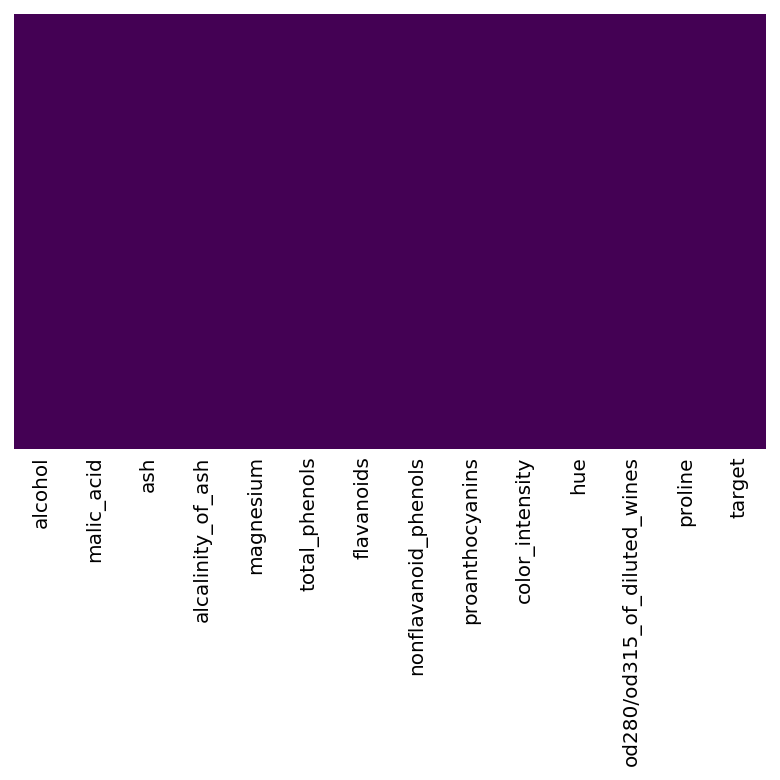

In [6]:
T(df).showna()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


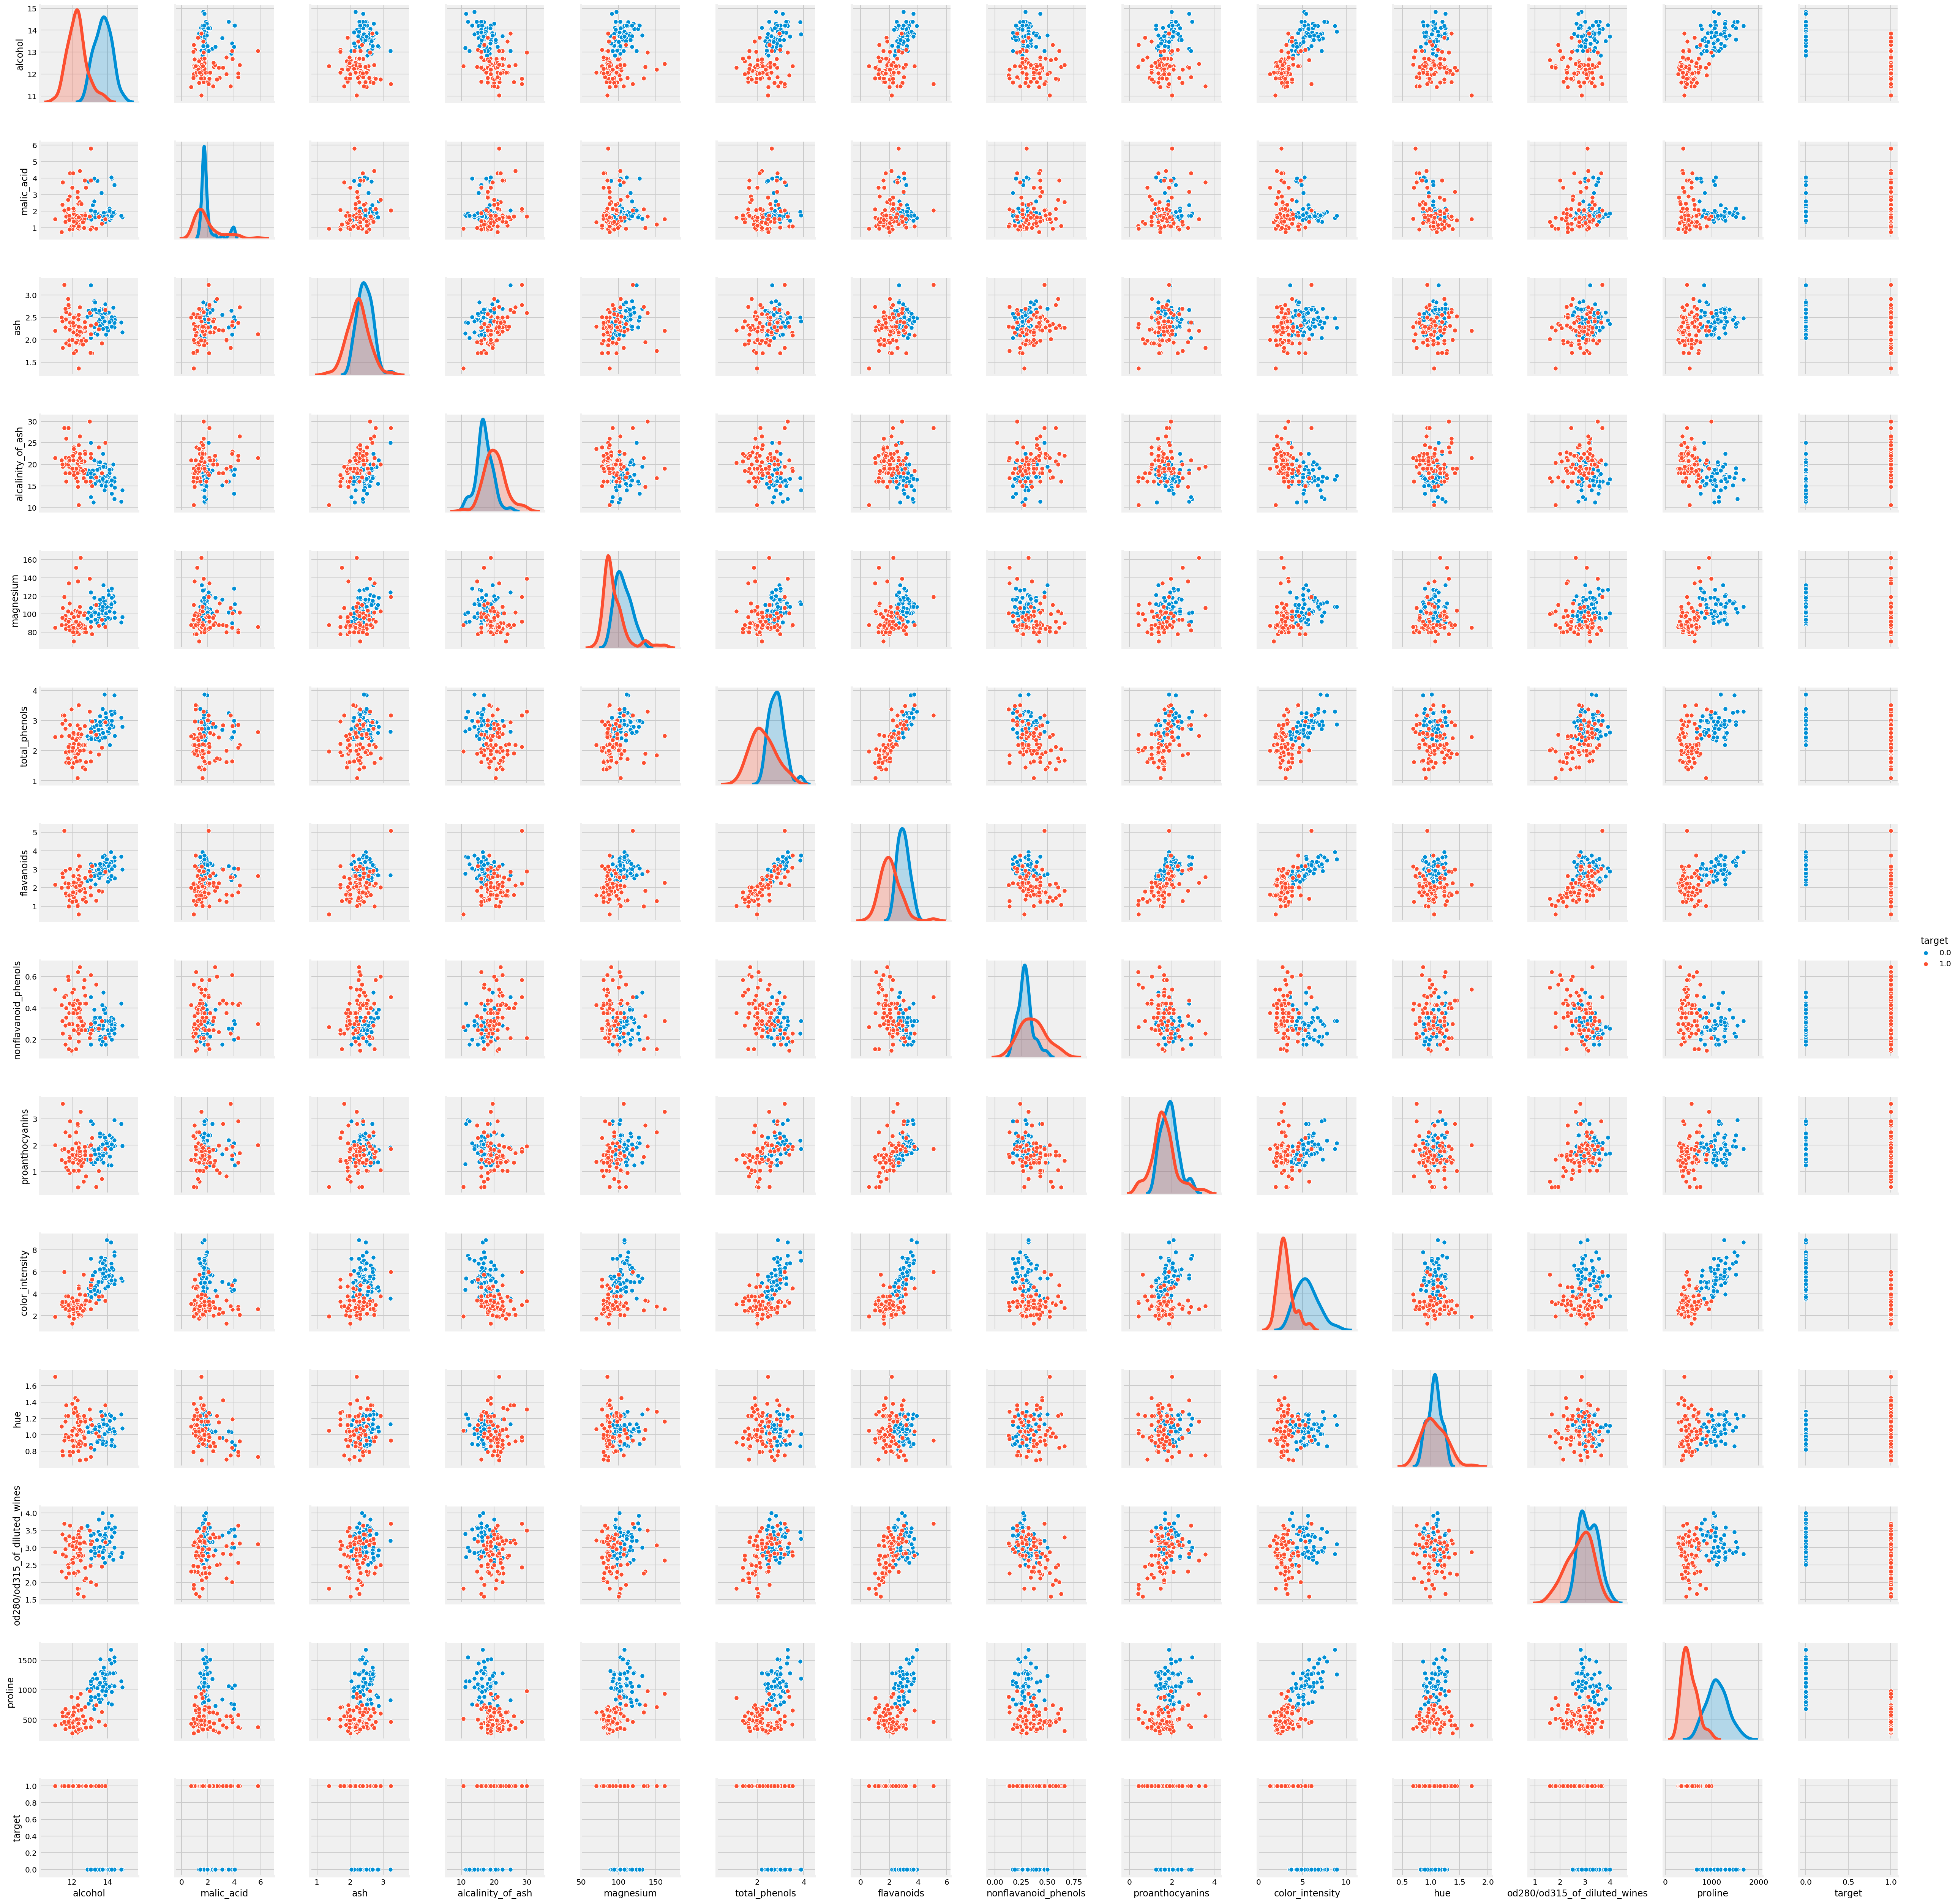

In [6]:
sns.pairplot(df, hue='target')

In [8]:
X = df.drop(columns="target")
y = T(df).select("target")

display(X.head(), y.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Train & Test split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.30 
                                                    , random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Training & Predicting

In [12]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

clf = lgb.train(parameters, d_train, 1000)

In [13]:
#Prediction
y_pred=clf.predict(x_test)
y_pred

array([9.62556031e-04, 5.58573166e-05, 2.72338990e-08, 1.68867669e-03,
       1.00000000e+00, 1.18750313e-05, 9.99996275e-01, 9.99999999e-01,
       1.67626269e-01, 3.76274162e-08, 9.99948804e-01, 3.89241866e-04,
       1.00000000e+00, 3.64311005e-04, 9.99999971e-01, 9.99769454e-01,
       3.09836927e-06, 1.00000000e+00, 9.99999866e-01, 1.00000000e+00,
       1.16996815e-05, 2.36265825e-08, 9.99999885e-01, 6.09455665e-06,
       9.99999660e-01, 3.68397950e-07, 9.99992634e-01, 9.99949441e-01,
       1.41778269e-05, 4.79832304e-06, 2.64929548e-07, 1.26443355e-08,
       4.54363518e-06, 2.06360883e-04, 9.99999959e-01, 1.00000000e+00,
       1.00000000e+00, 4.36914943e-09, 9.99999854e-01])

In [14]:
#convert into binary values
for i in range(0,y_pred.size):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
y_pred

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1.])

## Accuracy

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      0.95      0.97        19

   micro avg       0.97      0.97      0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values,y_pred)

array([[20,  0],
       [ 1, 18]], dtype=int64)